In [14]:
# вычисление многократных интегралов с использованием метода Монте-Карло
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20, 10)

def Monte_Carlo(f, area, N):   # N - кол-во испытаний, area{x1: (a1, b1), ..., xm: (am, bm)} - координаты начальных и конечных точек описывающей фигуры
    random_points = []
    sum_f = 0 # сумма значений функции в точках
    sum_inside = 0 # кол-во точек в области функции
    area_ksi = {k: (0, 1) for k in area.keys()} # область для генерации кси
    a, b = zip(*[x for x in area.values()])
    V = reduce(lambda x, y: x * y, list(map(lambda x, y: y - x, a, b))) # V = (b1 - a1) * ... * (bm - am)
    
    for n in range(N):
        ksi = {k: np.random.uniform(low, high) for k, (low, high) in area_ksi.items()} # точки 0 <= ksi <= 1
        x_ksi = dict(zip(ksi.keys(), list(map(lambda x, y, z: x + (y - x) * z, a, b, ksi.values())))) # x, выраженные через ksi
        random_points.append(x_ksi)
        
        if conditions(x_ksi) == True:
            sum_inside += 1
            fx = f(x_ksi)
            sum_f = sum_f + fx
            
    integral_value = V * sum_f / N
    
    return integral_value
            
    
def error_graph(area, f=None, true_value=None):
    value_x = []
    value_y = []
    print(f'True value: {true_value}')
    for n in range(10, 100000, 1000):
        value_x.append(n)
        value = Monte_Carlo(f, area, n)
        error = abs(true_value - value)
        value_y.append(error)
        print(f'Iteration: {n}: {value}. Error: {error}')
    
    plt.plot(value_x, value_y, '-ob')
    plt.xlabel('Iteration')
    plt.ylabel('Error')

True value: 0.49865
Iteration: 10: 0.5436627025080976. Error: 0.04501270250809758
Iteration: 1010: 0.480022581975525. Error: 0.018627418024474984
Iteration: 2010: 0.485720876096517. Error: 0.012929123903482997
Iteration: 3010: 0.5004936609338707. Error: 0.0018436609338707277
Iteration: 4010: 0.48823683809740603. Error: 0.010413161902593948
Iteration: 5010: 0.499643667710217. Error: 0.0009936677102170277
Iteration: 6010: 0.4978393352401184. Error: 0.0008106647598815631
Iteration: 7010: 0.4942615443749885. Error: 0.0043884556250115
Iteration: 8010: 0.4977589374744133. Error: 0.0008910625255866833
Iteration: 9010: 0.5009377588932428. Error: 0.002287758893242786
Iteration: 10010: 0.500441085881479. Error: 0.001791085881478971
Iteration: 11010: 0.4997099770581212. Error: 0.0010599770581212198
Iteration: 12010: 0.4968565400483275. Error: 0.0017934599516724603
Iteration: 13010: 0.5033244329002912. Error: 0.004674432900291181
Iteration: 14010: 0.4933106236667489. Error: 0.0053393763332511
Iter

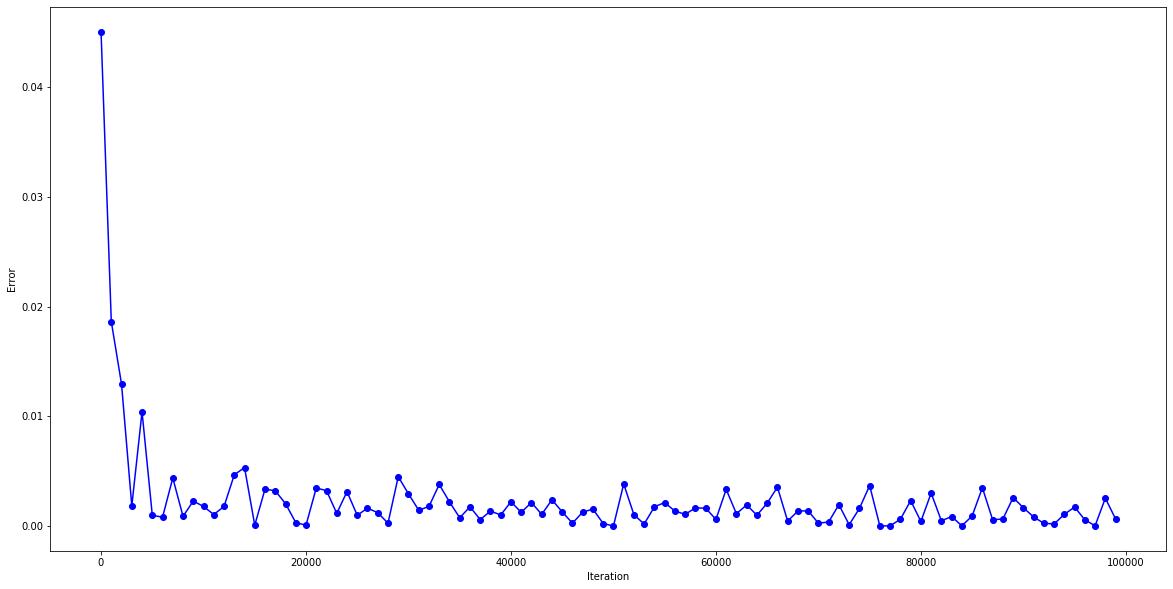

In [15]:
def function(x):
#     return x['x1'] + x['x2'] # точное значение интеграла = 0.5 - двойной интеграл
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x['x1'] ** 2 / 2) # точное значение интеграла Ф(3) = 0.49865 - обычный интеграл

def conditions(point):
    value = False
#     if (point['x1'] >= 0 and point['x1'] <= 1 and point['x2'] >= point['x1'] and point['x2'] <= 1):
    if point['x1'] >= 0 and point['x1'] <= 3:
        value = True
    return value

# area = {'x1': (0, 1), 'x2': (0, 1)}
area = {'x1': (0, 3)}        

error_graph(area, function, 0.49865)

True value: 0.5
Iteration: 10: 0.0. Error: 0.5
Iteration: 1010: 0.5096672418135049. Error: 0.009667241813504868
Iteration: 2010: 0.49193736984339465. Error: 0.008062630156605355
Iteration: 3010: 0.4774124288463601. Error: 0.022587571153639907
Iteration: 4010: 0.49429136119522094. Error: 0.005708638804779065
Iteration: 5010: 0.4960380852139911. Error: 0.00396191478600888
Iteration: 6010: 0.49740893582232487. Error: 0.0025910641776751286
Iteration: 7010: 0.501359119790674. Error: 0.001359119790674046
Iteration: 8010: 0.502655268191092. Error: 0.002655268191091964
Iteration: 9010: 0.5119872276715731. Error: 0.01198722767157312
Iteration: 10010: 0.507657454335746. Error: 0.00765745433574605
Iteration: 11010: 0.4998511221085278. Error: 0.00014887789147222108
Iteration: 12010: 0.5065145482529526. Error: 0.006514548252952612
Iteration: 13010: 0.4974347444475219. Error: 0.0025652555524781073
Iteration: 14010: 0.5055494432406284. Error: 0.005549443240628449
Iteration: 15010: 0.495782765784864. 

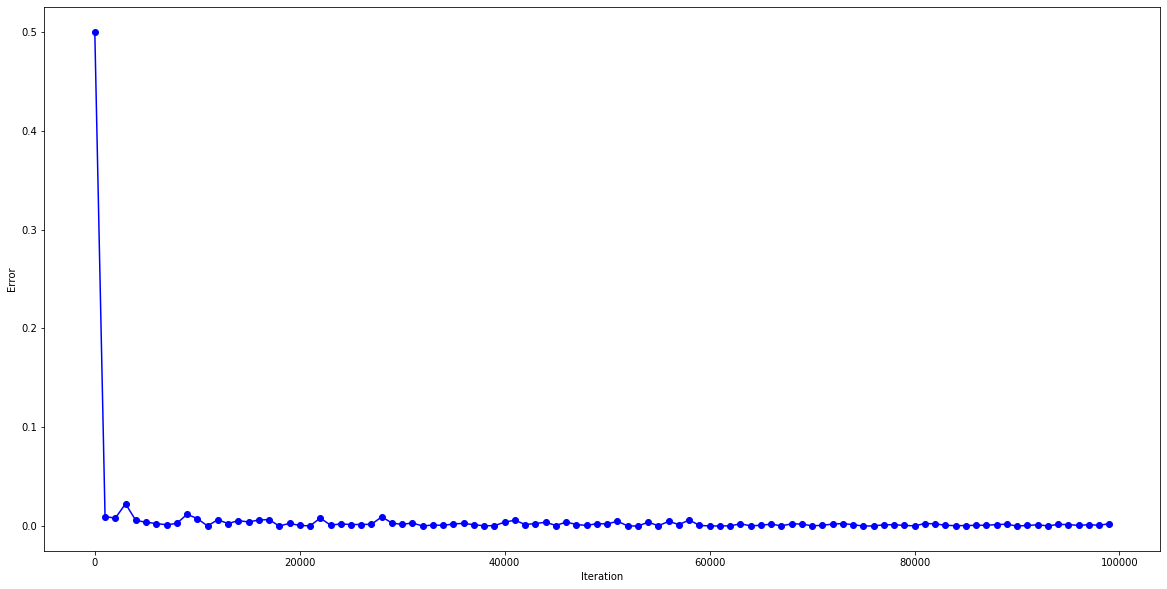

In [16]:
def function(x):
    return x['x1'] + x['x2'] # точное значение интеграла = 0.5 - двойной интеграл
#     return (1 / np.sqrt(2 * np.pi)) * np.exp(-x['x1'] ** 2 / 2) # точное значение интеграла Ф(3) = 0.49865 - обычный интеграл

def conditions(point):
    value = False
    if (point['x1'] >= 0 and point['x1'] <= 1 and point['x2'] >= point['x1'] and point['x2'] <= 1):
#     if point['x1'] >= 0 and point['x1'] <= 3:
        value = True
    return value

area = {'x1': (0, 1), 'x2': (0, 1)}
# area = {'x1': (0, 3)}        

error_graph(area, function, 0.5)